In [37]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [28]:
rng = np.random.default_rng(729)

In [6]:
def match_formation(party_size, arrivals, match_size=5):

    matches = []
    loads = []
    match_id = []
    match_assign = []

    for i, size in enumerate(party_size):
        best_idx = None
        best_remaining = None  

        for j, load in enumerate(loads):    
            if load + size > match_size:
                continue

            remaining = match_size - (load + size)
            if best_idx is None or remaining < best_remaining:
                best_idx = j
                best_remaining = remaining

        if best_idx is None:
            best_idx = len(matches)
            match_id.append([])
            matches.append([])
            loads.append(0)
            

        matches[best_idx].append(size)
        loads[best_idx] += size
        match_id[best_idx].append(i)
        match_assign.append(best_idx)

    wait_time = []
    individual_wt = []

    for ids in match_id:
        last_idx = max(ids)
        total_wait = sum(last_idx - idx for idx in ids)
        average_wt = total_wait/len(ids)
        wait_time.append([total_wait, average_wt]) 
    
    for party_idx, size in enumerate(party_size):
        match_idx = match_assign[party_idx]
        last_arrival_in_match = max(match_id[match_idx])
        wait = last_arrival_in_match - party_idx
        
        # Each person in the party has the same wait time
        for _ in range(size):
            individual_wt.append(wait)

    return matches, wait_time, individual_wt

In [29]:
N = 1000
sizes = np.random.randint(1, 6, size=N)
arrivals = rng.uniform(0, 5, size=N)

In [30]:
parties, wt, ind_wt = match_formation(sizes, arrivals)

In [31]:
avg_wt = [w[1] for w in wt]

count    632.000000
mean      22.442247
std       29.697100
min        0.000000
25%        0.000000
50%        4.833333
75%       41.000000
max       99.000000
dtype: float64

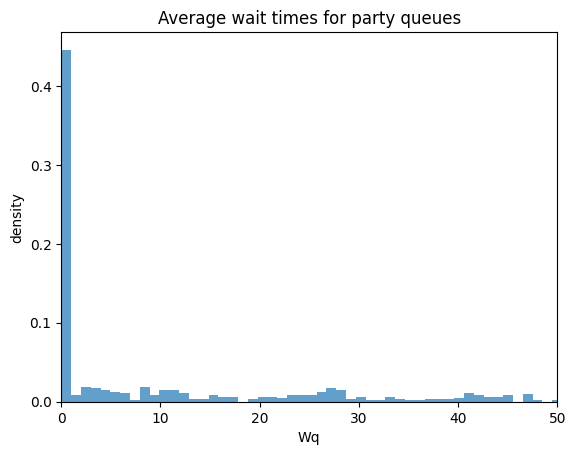

In [35]:
plt.figure()
plt.hist(avg_wt, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Average wait times for party queues")
plt.xlim(0, 50)

s = pd.Series(avg_wt)
s.describe()

In [39]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0, 5, size=N)
    sizes = np.random.randint(1, 6, size=N)
    
    parties, wt, ind_wt = match_formation(sizes, arrivals)
    
    avg_wt = [w[1] for w in wt]
    s = pd.Series(avg_wt)
    
    means.append(s.describe()[1])    # [1] is the mean
    medians.append(s.describe()[5])  # [5] is the median

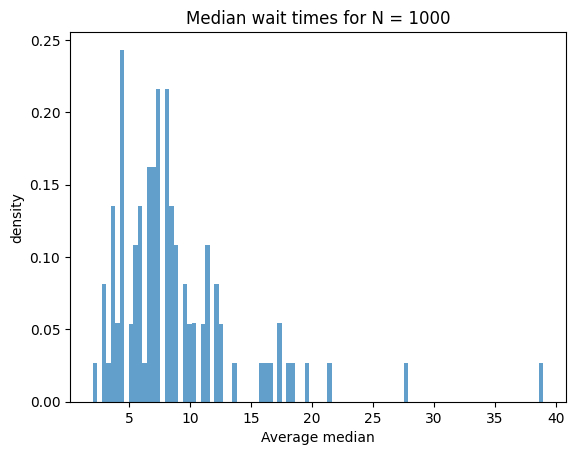

In [40]:
# median
plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median")
plt.ylabel("density")
plt.title("Median wait times for N = 1000")
plt.show()

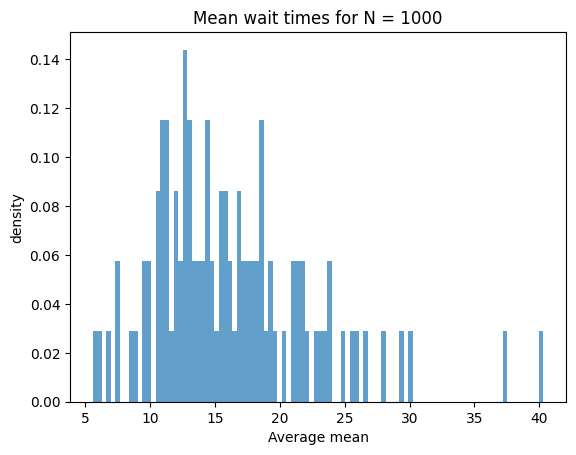

In [41]:
# mean
plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean")
plt.ylabel("density")
plt.title("Mean wait times for N = 1000")
plt.show()

In [43]:
def Poissondist(N, lmb):
    arr = rng.poisson(lmb, size=N)
    for i in range(N):
        if arr[i] == 0:
            arr[i] = 1
        if arr[i] > 5:
            arr[i] = rng.choice([1,2,3,4,5])
    return arr

Text(0.5, 1.0, 'Individual Wait in Queue: (Poisson Party Size)')

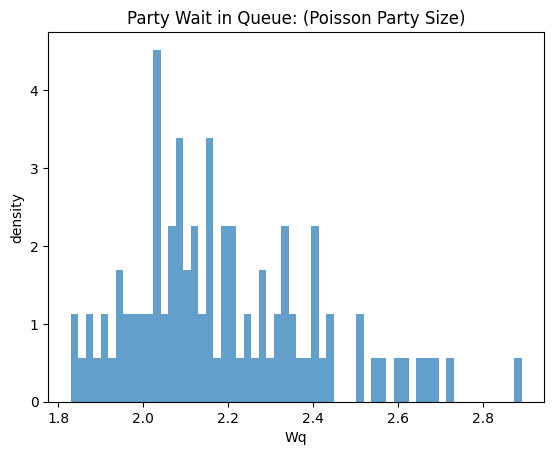

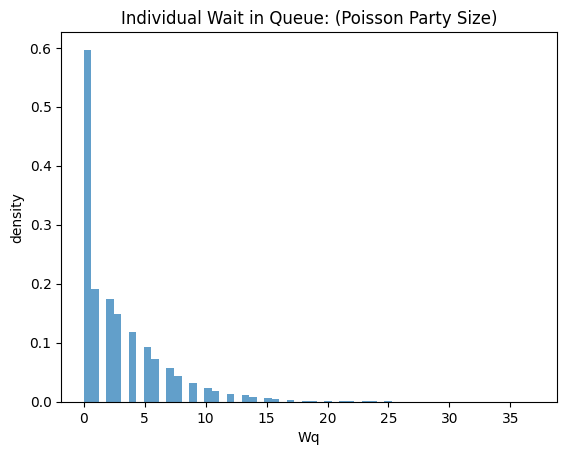

In [45]:
N = 1000
means = []
medians = []
individual_wt = []

for i in range(100):
    arrivals = rng.uniform(0, 5, size=N)
    sizes = Poissondist(N, 2)
    
    parties, wt, ind_wt = match_formation(sizes, arrivals)
    avg_wt = [w[1] for w in wt]
    
    s = pd.Series(avg_wt)
    means.append(s.describe()[1])    
    medians.append(s.describe()[5])

    individual_wt.extend(ind_wt)
plt.figure()
plt.hist(means, bins=60, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Party Wait in Queue: (Poisson Party Size)")

plt.figure()
plt.hist(individual_wt, bins=60, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("Individual Wait in Queue: (Poisson Party Size)")